In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

In [2]:
# Read the dataset into a data frame
df = pd.read_excel('nyc_crime2013.xls', skiprows=4)
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [3]:
# Create a data frame with only the features of interest
df.rename(columns={'Property\ncrime': 'PropertyCrime', 'Murder and\nnonnegligent\nmanslaughter': 'Murder',
                     'Rape\n(legacy\ndefinition)2': 'Rape', 'Aggravated\nassault': 'AggravatedAssault', 
                   'Violent\ncrime': 'ViolentCrime', 'Larceny-\ntheft': 'Larceny', 'Motor\nvehicle\ntheft': 'CarTheft'},
          inplace=True)
pc_df = df.drop(columns=['Rape\n(revised\ndefinition)1', 'Arson3']).copy()

pc_df.head()

,City,Population,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Larceny,CarTheft
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0
2,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0
3,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0
4,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0


In [4]:
# Drop the information rows at the end of the dataset
pc_df.dropna(how='any', inplace=True)
pc_df.describe()

,Population,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Larceny,CarTheft
count,3.480000e+02,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,4.003763e+04,201.594828,1.566092,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172
std,4.500374e+05,2815.268504,18.303673,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826
min,5.260000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000
75%,1.842750e+04,22.000000,0.000000,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000
max,8.396126e+06,52384.000000,335.000000,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000


In [5]:
# Read in census data on area and population density 
df = pd.read_csv('ny_census_pop_area.csv', encoding='iso8859_5', skiprows=1)
df = df[df['Geography'] == 'New York']
df.head(30)

,Id,Id2,Geography,Target Geo Id,Target Geo Id2,Geographic area,Geographic area.1,Population,Housing units,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,Density per square mile of land area - Population,Density per square mile of land area - Housing units
22853,0400000US36,36,New York,0400000US36,36,New York,New York,19378102,8108103,54554.98,7428.58,47126.40,411.2,172.1
22854,0400000US36,36,New York,1600000US3600155,3600155,New York - PLACE AND COUNTY SUBDIVISION - Acco...,"Accord CDP, Ulster County",562,265,3.44,0.04,3.40,165.3,77.9
22855,0400000US36,36,New York,1600000US3600199,3600199,New York - PLACE AND COUNTY SUBDIVISION - Adam...,"Adams village, Jefferson County",1775,793,1.45,0.00,1.45,1226.7,548.0
22856,0400000US36,36,New York,0600000US3604500210,3604500210,New York - PLACE AND COUNTY SUBDIVISION - Adam...,"Adams town, Jefferson County",5143,2126,42.42,0.15,42.27,121.7,50.3
22857,0400000US36,36,New York,1600000US3600232,3600232,New York - PLACE AND COUNTY SUBDIVISION - Adam...,"Adams Center CDP, Jefferson County",1568,629,4.99,0.14,4.86,322.9,129.6
22858,0400000US36,36,New York,1600000US3600276,3600276,New York - PLACE AND COUNTY SUBDIVISION - Addi...,"Addison village, Steuben County",1763,770,1.89,0.00,1.89,931.4,406.8
22859,0400000US36,36,New York,0600000US3610100287,3610100287,New York - PLACE AND COUNTY SUBDIVISION - Addi...,"Addison town, Steuben County",2595,1159,25.69,0.14,25.55,101.6,45.4
22860,0400000US36,36,New York,1600000US3600342,3600342,New York - PLACE AND COUNTY SUBDIVISION - Afto...,"Afton village, Chenango County",822,430,1.60,0.07,1.53,538.5,281.7
22861,0400000US36,36,New York,0600000US3601700353,3601700353,New York - PLACE AND COUNTY SUBDIVISION - Afto...,"Afton town, Chenango County",2851,1457,46.51,0.68,45.84,62.2,31.8
22862,0400000US36,36,New York,1600000US3600408,3600408,New York - PLACE AND COUNTY SUBDIVISION - Airm...,"Airmont village, Rockland County",8628,2791,4.64,0.00,4.64,1858.3,601.1


In [6]:
# Isolate columns of interest, rename, strip county information, set to lower case, take only matches with crime data
area_df = df[['Geographic area.1', 'Housing units', 'Area in square miles - Land area']]
area_df = area_df.drop(22853)

area_df.rename(columns={'Geographic area.1': 'City', 'Housing units': 'Residences',
                        'Area in square miles - Land area': 'Area'}, inplace=True)

area_df['City'] = area_df['City'].str.split(',', expand=True)
area_df['City'] = area_df['City'].str.lower()

area1_df = area_df[area_df['City'].str.lower().isin(pc_df['City'].str.lower())]

area_df.head()

,City,Residences,Area
22854,accord cdp,265,3.40
22855,adams village,793,1.45
22856,adams town,2126,42.27
22857,adams center cdp,629,4.86
22858,addison village,770,1.89


In [7]:
# merge data frames on city
pc_df['City'] = pc_df['City'].str.lower()
pc_df = pc_df.merge(area1_df, how='left', on='City')
pc_df.head()

,City,Population,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Larceny,CarTheft,Residences,Area
0,adams village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,793.0,1.45
1,addison town and village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,NaN,NaN
2,akron village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,1382.0,1.98
3,albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN,NaN
4,albion village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,2714.0,2.92


In [8]:
# Find the amomalous robbery cities
robbery_anomaly = pc_df['Robbery'].mean() + (2 * np.std(pc_df['Robbery'])) 
pc_df.drop(pc_df.loc[pc_df['Robbery'] > robbery_anomaly].index, inplace=True)

In [9]:
nan_list = pc_df[pc_df['Area'].isna()].loc[:, 'City'].tolist()
prefixes = [s.replace(' town and village', '') for s in nan_list]
prefixes = [s.replace('-aurora town', '') for s in prefixes]
for city in nan_list:
    prefix = prefixes[nan_list.index(city)]
    pre_area_res = area_df[area_df['City'].str.contains(prefix, regex=False)]
    pc_df.loc[pc_df.City==city, 'Residences'] = pre_area_res['Residences'].values.sum()
    pc_df.loc[pc_df.City==city, 'Area'] = pre_area_res['Area'].values.sum()
pc_df.head()

,City,Population,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Larceny,CarTheft,Residences,Area
0,adams village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,793.0,1.45
1,addison town and village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,1929.0,27.44
2,akron village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,1382.0,1.98
3,albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,46362.0,21.39
4,albion village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,2714.0,2.92


In [10]:
#Create binary murder feature
pc_df['Murder'] = pc_df['Murder'].apply(lambda x: 1 if x>0 else 0)
pc_df['CrimesInt'] = pc_df['ViolentCrime'] * pc_df['PropertyCrime']
pc_df['PopDensity'] = pc_df['Population'] / pc_df['Area']
pc_df['HomeDensity'] = pc_df['Residences']  / pc_df['Area']
pc_df['PopHomes'] = pc_df['Population'] / pc_df['Residences']
pc_df.set_index('City', inplace=True)
pc_df.head()

,Population,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Larceny,CarTheft,Residences,Area,CrimesInt,PopDensity,HomeDensity,PopHomes
City,,,,,,,,,,,,,,,,
adams village,1861.0,0.0,0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,793.0,1.45,0.0,1283.448276,546.896552,2.346784
addison town and village,2577.0,3.0,0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,1929.0,27.44,72.0,93.913994,70.298834,1.335925
akron village,2846.0,3.0,0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,1382.0,1.98,48.0,1437.373737,697.979798,2.059334
albany,97956.0,791.0,1,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,46362.0,21.39,3235190.0,4579.523142,2167.461431,2.112851
albion village,6388.0,23.0,0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,2714.0,2.92,5129.0,2187.671233,929.452055,2.353721


In [11]:
pc_df = pc_df[pc_df['Residences']!=0]

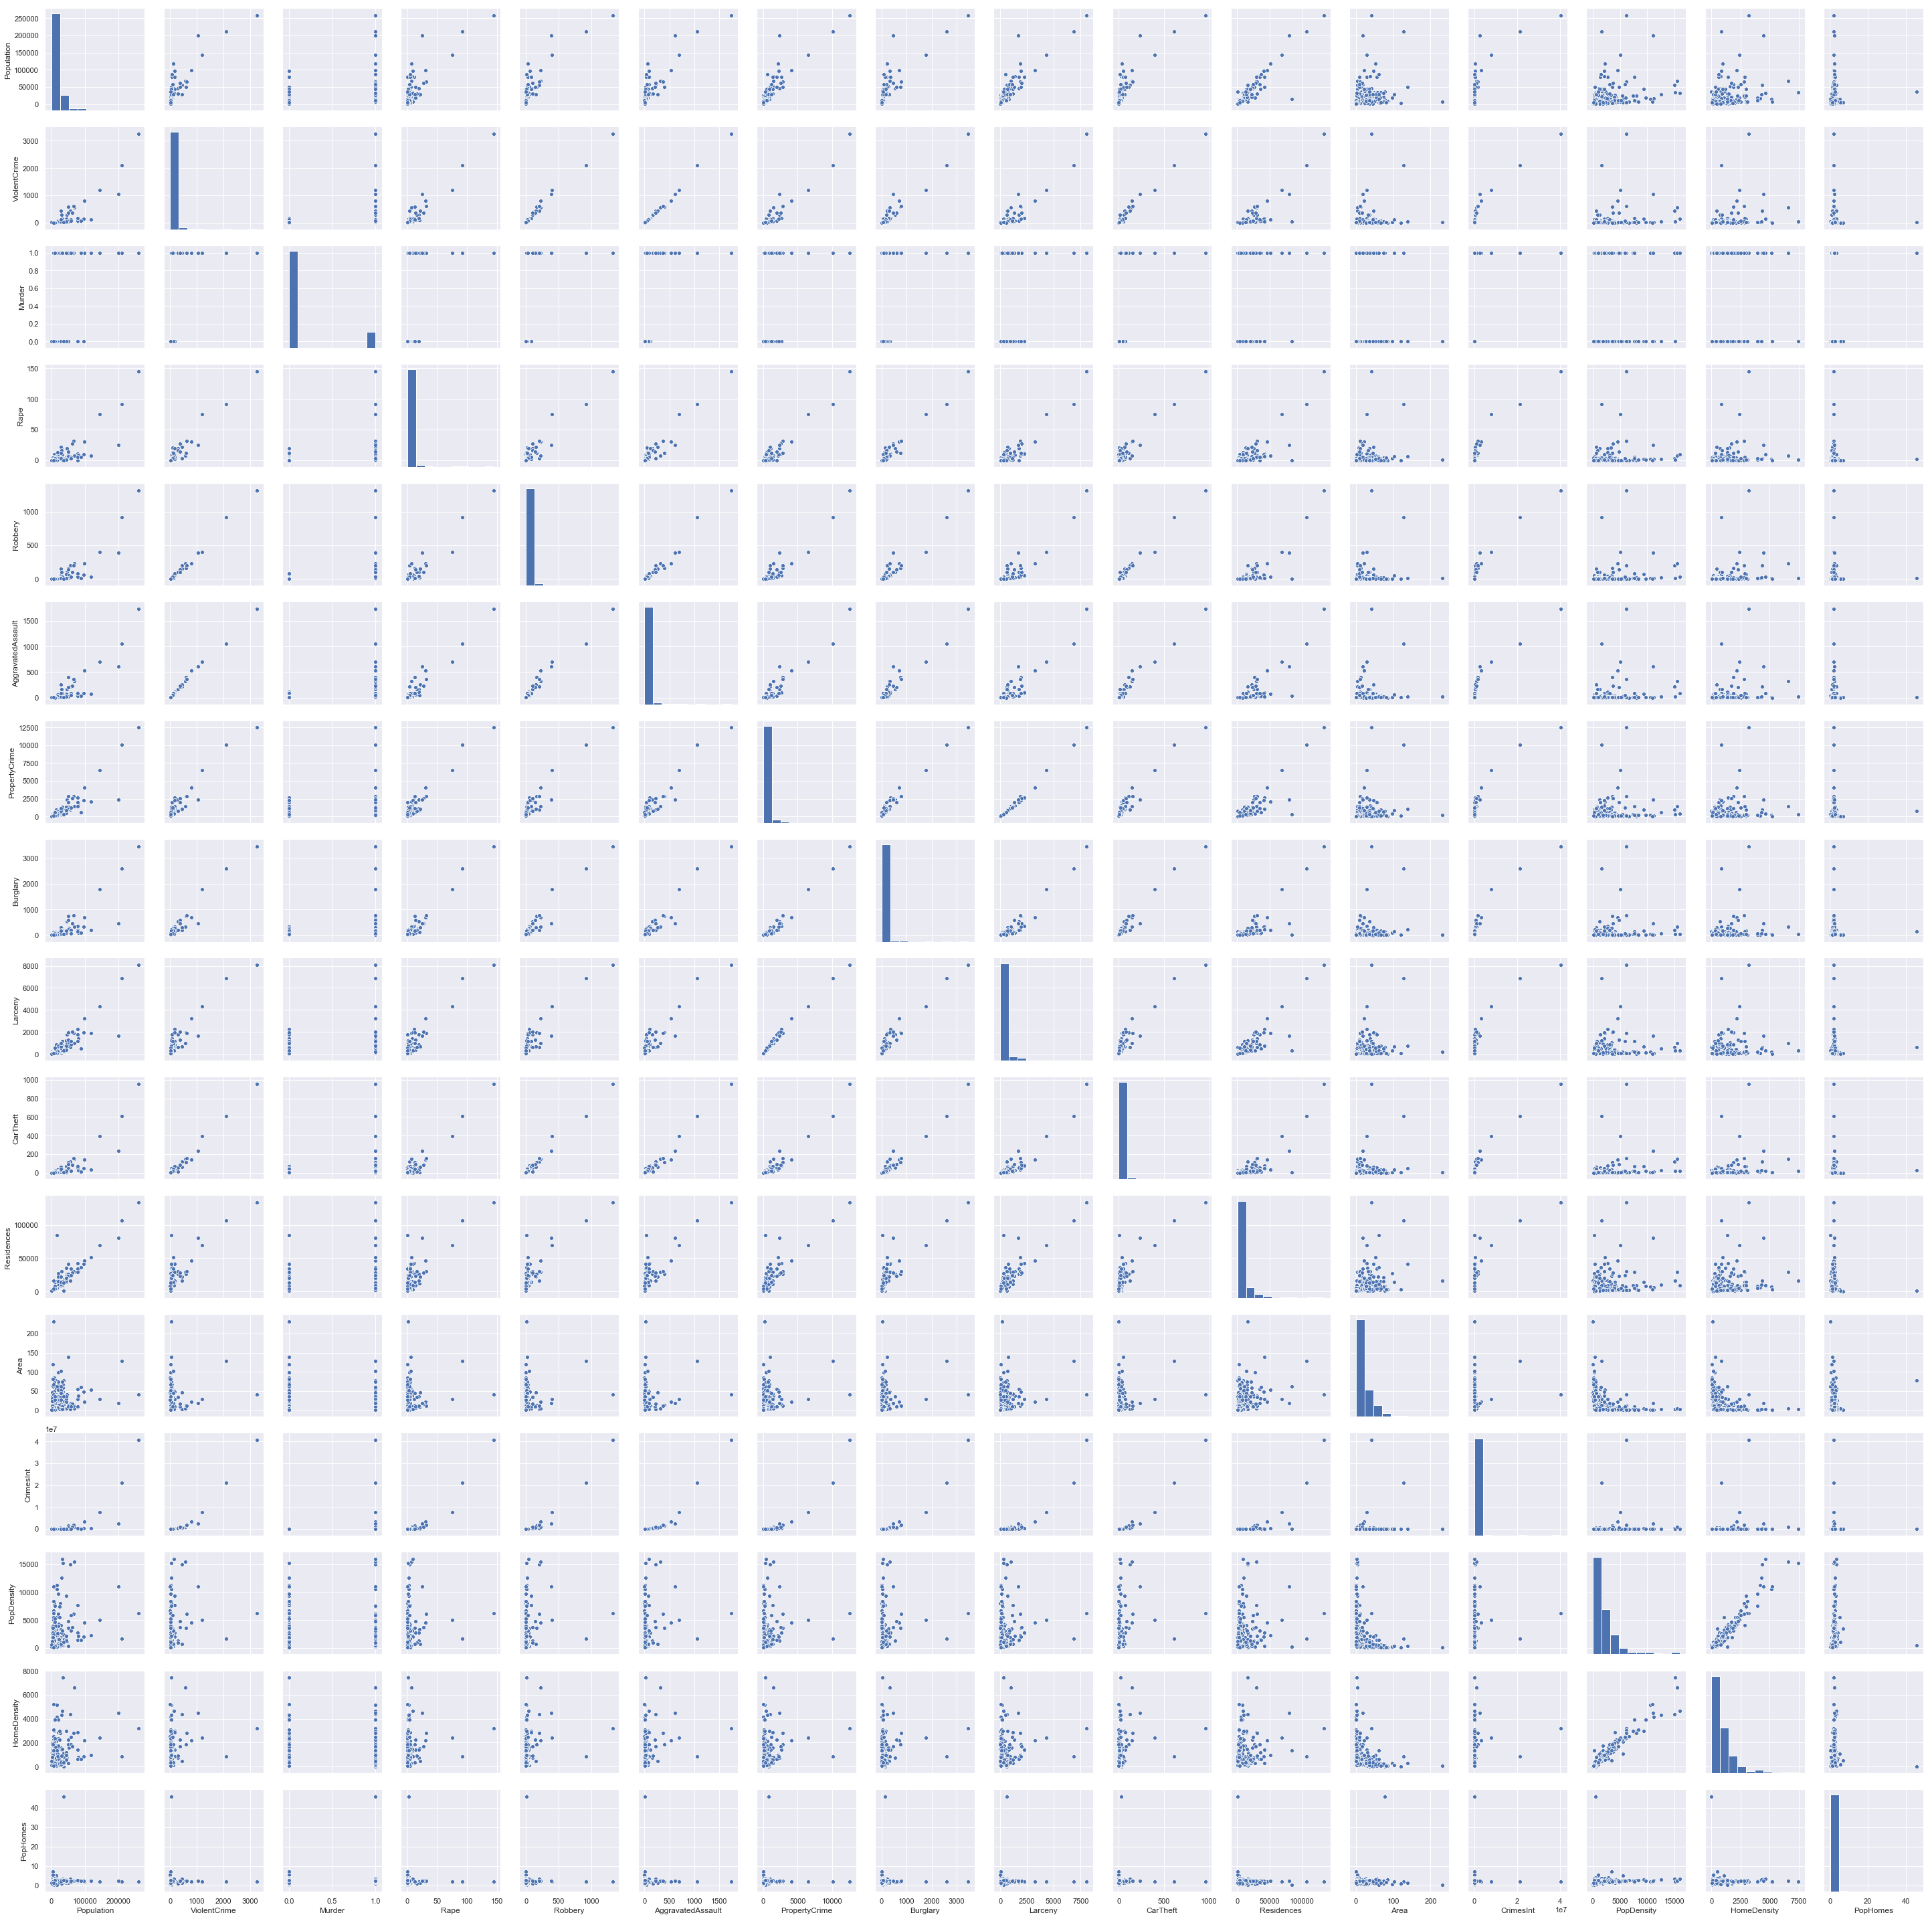

In [12]:
sns.set()
sns.pairplot(pc_df)
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(C=1e9, penalty='l2', solver='liblinear', max_iter=1000)
y = pc_df['Murder']
X = pc_df.loc[:, ~(pc_df.columns).isin(['Murder'])]
n_split = int(len(y) / 2)
y_train, y_test = y[:n_split], y[n_split:]
X_train, X_test = X.iloc[:n_split, :], X.iloc[n_split:, :]


# Fit the model.
fit = lr.fit(X_train, y_train)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_vlr = lr.predict(X_test)

print('\n Accuracy by murder binary')
print(pd.crosstab(pred_vlr, y_test))

print('\n Percentage accuracy')
print(lr.score(X_test, y_test))

Coefficients
[[ 6.92852369e-05  3.02270171e-02  7.76476887e-03  2.95965503e-02
  -2.39903741e-02  5.54027731e-03 -6.81880331e-03 -6.95734488e-03
   1.93164255e-02 -7.22965785e-05 -5.10350299e-02 -2.47053047e-06
  -1.13834061e-03  5.56298306e-04  4.19560659e-03]]
[-0.01781629]

 Accuracy by murder binary
Murder    0   1
row_0          
0       144  19
1         1  10

 Percentage accuracy
0.8850574712643678


In [30]:
rlr = LogisticRegression(C=13, penalty='l2', solver='lbfgs', max_iter=1000)

# Fit the model.
fit = rlr.fit(X_train, y_train)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_ridge = rlr.predict(X_test)

print('\n Accuracy by murder binary')
print(pd.crosstab(pred_ridge, y_test))

print('\n Percentage accuracy')
print(rlr.score(X_test, y_test))

Coefficients
[[ 7.72350184e-05  2.69509130e-02  1.76913015e-03  1.54740485e-02
   6.85125012e-03  8.87042060e-04 -4.79860349e-03 -2.18793420e-03
   7.87357975e-03 -8.10557111e-05 -5.59051329e-02 -2.48155384e-06
  -1.09196081e-03  4.02783674e-04 -5.29017186e-03]]
[-0.00376368]

 Accuracy by murder binary
Murder    0   1
row_0          
0       144  17
1         1  12

 Percentage accuracy
0.896551724137931


In [25]:
llr = LogisticRegression(C=12, penalty='l1', solver='liblinear', max_iter=1000)

# Fit the model.
fit = llr.fit(X_train, y_train)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_lasso = llr.predict(X_test)

print('\n Accuracy by murder binary')
print(pd.crosstab(pred_lasso, y_test))

print('\n Percentage accuracy')
print(llr.score(X_test, y_test))

Coefficients
[[ 2.35579152e-05  1.93349311e+00 -1.86881333e+00 -1.94348816e+00
  -1.91869516e+00  5.14685479e-05  6.72769606e-03 -1.28708560e-03
  -2.12960072e-02  4.12255921e-05  7.27587424e-03 -2.71996102e-06
  -2.76107080e-04  1.28149708e-03  1.89027131e-01]]
[-4.83295214]

 Accuracy by murder binary
Murder    0   1
row_0          
0       143  10
1         2  19

 Percentage accuracy
0.9310344827586207


## Reflection on Model Performance

In your report, evaluate all three models and decide on your best. Be clear about the decisions you made that led to these models (feature selection, regularization parameter selection, model evaluation criteria) and why you think that particular model is the best of the three. Also reflect on the strengths and limitations of regression as a modeling approach. Were there things you couldn't do but you wish you could have done?

The features I selected and engineered were an attempt to gain as much criminal context for the cities of New York with just crime, population, housing units, and area data. I did not want to arbitrarily engineer interactions between different types of crime without any hypothetical basis for those interactions, so I pulled in area and housing units data to create what I thought would be more meaningful interactions. 

The parameters I chose were based on trial and error. Once I had the features I wanted, I ran the code with various combinations of solvers and 'C' values. When I determined the values for those two parameters that achieved the best accuracy, I received a warning that there were too few iterations to converge, so I increased the max_iter from 100 to 1000.

I chose to use both a confusion matrix and percentage accuracy for all model to see not only absolute accuracy, but to compare how each of the models missed. The vanilla logistic regression and the ridge logisitice progression performed marginally better at accurately predicting the dominant class, but the lasso logistic regression model was the best of the three because it showed significant improvement in predicting the non-dominant class than the other two (65.5% vs. 41.4% and 34.5%).

Drawbacks of this data include the inability to dealing with missing values. In my desire to use area and housing units, I had to spend a lot of time trying to manipulate strings to get the cities in one data frame to match the other so I could merge the values. Even then, I ended up with null values that needed a new solution. After that, I still had two rows with zero values that would result in nulls due to division by zero in the density column. It would also have been difficult to model this if there were no linear relationships between the features and the outcome. 

